In [29]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core import Structure
from pymatgen.io.vasp.outputs import Oszicar, Outcar, Vasprun, Poscar
from pymatgen.io.vasp.sets import MPRelaxSet
from pymatgen.core.surface import SlabGenerator
from pymatgen.analysis.surface_analysis import get_slab_regions
import slab_functions as sf
import numpy as np
import matplotlib.pyplot as plt
# import crystal_toolkit

In [8]:
# Import bulk-relaxed CaTiO3

bulk_relaxed_CONTAR = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/bulk_relaxed_CONTCAR")
cart_coords = bulk_relaxed_CONTAR.cart_coords
print(len(bulk_relaxed_CONTAR.cart_coords))
# print(bulk_relaxed_CONTAR)
print(bulk_relaxed_CONTAR[0])
# # for i in range (0, 21):
# #     bulk_relaxed_CONTAR[i] = cart_coords[i]

# print(cart_coords[0])
# print(bulk_relaxed_CONTAR[0])
# # print(bulk_relaxed_CONTAR)
# bulk_relaxed_CONTAR

bulk_input_set = MPRelaxSet(bulk_relaxed_CONTAR)
bulk_input_set.write_input(".")

20
[2.75682796 3.004791   5.77556506] Ca


/Users/eyob/opt/miniconda3/envs/catio3_kinetics/lib/python3.13/site-packages/pymatgen/io/vasp/sets.py:937: BadInputSetWarning: POTCAR data with symbol Ca_sv is not known by pymatgen to correspond with the selected user_potcar_functional='PBE'. This POTCAR is known to correspond with functionals ['PBE_54_W_HASH', 'PBE_64', 'PBE_52_W_HASH']. Please verify that you are using the right POTCARs!
  warnings.warn(
/Users/eyob/opt/miniconda3/envs/catio3_kinetics/lib/python3.13/site-packages/pymatgen/io/vasp/sets.py:937: BadInputSetWarning: POTCAR data with symbol Ti_pv is not known by pymatgen to correspond with the selected user_potcar_functional='PBE'. This POTCAR is known to correspond with functionals ['PBE_54_W_HASH', 'PBE_64', 'PBE_52_W_HASH']. Please verify that you are using the right POTCARs!
  warnings.warn(
/Users/eyob/opt/miniconda3/envs/catio3_kinetics/lib/python3.13/site-packages/pymatgen/io/vasp/sets.py:937: BadInputSetWarning: POTCAR data with symbol O is not known by pymatgen 

# Test vacuum convergence script

In [30]:
# Template POSCAR
template_slab_generator = SlabGenerator(bulk_relaxed_CONTAR, (0,0,1), 10, 1)
template_slabs = template_slab_generator.get_slabs(symmetrize=True)
print(len(template_slabs))
template_slabs[0]
template_slabs_1_term = Poscar(template_slabs[0])
template_slabs_1_term.write_file(f"template_1_term.POSCAR", direct=False)

template_slabs_2_term = Poscar(template_slabs[1])
template_slabs_2_term.write_file(f"template_2_term.POSCAR", direct=False)

template_slabs_3_term = Poscar(template_slabs[2])
template_slabs_3_term.write_file(f"template_3_term.POSCAR", direct=False)

template_slabs_4_term = Poscar(template_slabs[3])
template_slabs_4_term.write_file(f"template_4_term.POSCAR", direct=False)

4


# Generate vasp input files

# 001 surface 1_term

In [73]:
vac_10_001_1_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/1_term/vac_size_10/001_1_term_vac_10.POSCAR")
vac_10_001_1_term_files = MPRelaxSet(vac_10_001_1_term)
vac_10_001_1_term_files.write_input(".")

/Users/eyob/opt/miniconda3/envs/catio3_kinetics/lib/python3.13/site-packages/pymatgen/io/vasp/sets.py:937: BadInputSetWarning:

POTCAR data with symbol Ca_sv is not known by pymatgen to correspond with the selected user_potcar_functional='PBE'. This POTCAR is known to correspond with functionals ['PBE_54_W_HASH', 'PBE_64', 'PBE_52_W_HASH']. Please verify that you are using the right POTCARs!

/Users/eyob/opt/miniconda3/envs/catio3_kinetics/lib/python3.13/site-packages/pymatgen/io/vasp/sets.py:937: BadInputSetWarning:

POTCAR data with symbol Ti_pv is not known by pymatgen to correspond with the selected user_potcar_functional='PBE'. This POTCAR is known to correspond with functionals ['PBE_54_W_HASH', 'PBE_64', 'PBE_52_W_HASH']. Please verify that you are using the right POTCARs!

/Users/eyob/opt/miniconda3/envs/catio3_kinetics/lib/python3.13/site-packages/pymatgen/io/vasp/sets.py:937: BadInputSetWarning:

POTCAR data with symbol O is not known by pymatgen to correspond with the select

In [74]:
c_length = vac_10_001_1_term.lattice.c

# Get the z-coordinates of all atoms
z_coords = [site.coords[2] for site in vac_10_001_1_term]

# Calculate the slab thickness
slab_thickness = max(z_coords) - min(z_coords)

# Calculate the vacuum size
vacuum_size = c_length - slab_thickness

print("Slab Thickness: {:.2f} Å".format(slab_thickness))
print("Vacuum Size: {:.2f} Å".format(vacuum_size))


Slab Thickness: 12.20 Å
Vacuum Size: 10.00 Å


In [75]:
vac_12_001_1_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/1_term/vac_size_12/001_1_term_vac_12.POSCAR")
vac_12_001_1_term_files = MPRelaxSet(vac_12_001_1_term)
vac_12_001_1_term_files.write_input(".")

In [76]:
vac_14_001_1_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/1_term/vac_size_14/001_1_term_vac_14.POSCAR")
vac_14_001_1_term_files = MPRelaxSet(vac_14_001_1_term)
vac_14_001_1_term_files.write_input(".")

In [77]:
vac_16_001_1_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/1_term/vac_size_16/001_1_term_vac_16.POSCAR")
vac_16_001_1_term_files = MPRelaxSet(vac_16_001_1_term)
vac_16_001_1_term_files.write_input(".")

In [78]:
vac_18_001_1_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/1_term/vac_size_18/001_1_term_vac_18.POSCAR")
vac_18_001_1_term_files = MPRelaxSet(vac_18_001_1_term)
vac_18_001_1_term_files.write_input(".")

In [79]:
vac_20_001_1_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/1_term/vac_size_20/001_1_term_vac_20.POSCAR")
vac_20_001_1_term_files = MPRelaxSet(vac_20_001_1_term)
vac_20_001_1_term_files.write_input(".")

In [80]:
vac_22_001_1_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/1_term/vac_size_22/001_1_term_vac_22.POSCAR")
vac_22_001_1_term_files = MPRelaxSet(vac_22_001_1_term)
vac_22_001_1_term_files.write_input(".")

# 001 surface 2_term

In [81]:
vac_10_001_2_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/2_term/vac_size_10/001_2_term_vac_10.POSCAR")
vac_10_001_2_term_files = MPRelaxSet(vac_10_001_2_term)
vac_10_001_2_term_files.write_input(".")

In [107]:
c_length = vac_10_001_2_term.lattice.c

# Get the z-coordinates of all atoms
z_coords = [site.coords[2] for site in vac_10_001_2_term]

# Calculate the slab thickness
slab_thickness = max(z_coords) - min(z_coords)

# Calculate the vacuum size
vacuum_size = c_length - slab_thickness

print("Slab Thickness: {:.2f} Å".format(slab_thickness))
print("Vacuum Size: {:.2f} Å".format(vacuum_size))

Slab Thickness: 11.55 Å
Vacuum Size: 11.55 Å


In [82]:
vac_12_001_2_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/2_term/vac_size_12/001_2_term_vac_12.POSCAR")
vac_12_001_2_term_files = MPRelaxSet(vac_12_001_2_term)
vac_12_001_2_term_files.write_input(".")

In [83]:
vac_14_001_2_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/2_term/vac_size_14/001_2_term_vac_14.POSCAR")
vac_14_001_2_term_files = MPRelaxSet(vac_14_001_2_term)
vac_14_001_2_term_files.write_input(".")

In [84]:
vac_16_001_2_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/2_term/vac_size_16/001_2_term_vac_16.POSCAR")
vac_16_001_2_term_files = MPRelaxSet(vac_16_001_2_term)
vac_16_001_2_term_files.write_input(".")

In [85]:
vac_18_001_2_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/2_term/vac_size_18/001_2_term_vac_18.POSCAR")
vac_18_001_2_term_files = MPRelaxSet(vac_18_001_2_term)
vac_18_001_2_term_files.write_input(".")

In [86]:
vac_20_001_2_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/2_term/vac_size_20/001_2_term_vac_20.POSCAR")
vac_20_001_2_term_files = MPRelaxSet(vac_20_001_2_term)
vac_20_001_2_term_files.write_input(".")

In [87]:
vac_22_001_2_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/2_term/vac_size_22/001_2_term_vac_22.POSCAR")
vac_22_001_2_term_files = MPRelaxSet(vac_22_001_2_term)
vac_22_001_2_term_files.write_input(".")

# 001 surface 3_term

In [88]:
vac_10_001_3_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/3_term/vac_size_10/001_3_term_vac_10.POSCAR")
vac_10_001_3_term_files = MPRelaxSet(vac_10_001_3_term)
vac_10_001_3_term_files.write_input(".")

In [108]:
c_length = vac_10_001_3_term.lattice.c

# Get the z-coordinates of all atoms
z_coords = [site.coords[2] for site in vac_10_001_3_term]

# Calculate the slab thickness
slab_thickness = max(z_coords) - min(z_coords)

# Calculate the vacuum size
vacuum_size = c_length - slab_thickness

print("Slab Thickness: {:.2f} Å".format(slab_thickness))
print("Vacuum Size: {:.2f} Å".format(vacuum_size))

Slab Thickness: 14.76 Å
Vacuum Size: 8.35 Å


In [89]:
vac_12_001_3_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/3_term/vac_size_12/001_3_term_vac_12.POSCAR")
vac_12_001_3_term_files = MPRelaxSet(vac_12_001_3_term)
vac_12_001_3_term_files.write_input(".")

In [90]:
vac_14_001_3_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/3_term/vac_size_14/001_3_term_vac_14.POSCAR")
vac_14_001_3_term_files = MPRelaxSet(vac_14_001_3_term)
vac_14_001_3_term_files.write_input(".")

In [91]:
vac_16_001_3_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/3_term/vac_size_16/001_3_term_vac_16.POSCAR")
vac_16_001_3_term_files = MPRelaxSet(vac_16_001_3_term)
vac_16_001_3_term_files.write_input(".")

In [92]:
vac_18_001_3_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/3_term/vac_size_18/001_3_term_vac_18.POSCAR")
vac_18_001_3_term_files = MPRelaxSet(vac_18_001_3_term)
vac_18_001_3_term_files.write_input(".")

In [93]:
vac_20_001_3_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/3_term/vac_size_20/001_3_term_vac_20.POSCAR")
vac_20_001_3_term_files = MPRelaxSet(vac_20_001_3_term)
vac_20_001_3_term_files.write_input(".")

In [94]:
vac_22_001_3_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/3_term/vac_size_22/001_3_term_vac_22.POSCAR")
vac_22_001_3_term_files = MPRelaxSet(vac_22_001_3_term)
vac_22_001_3_term_files.write_input(".")

# 001 surface 4_term

In [95]:
vac_10_001_4_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/4_term/vac_size_10/001_4_term_vac_10.POSCAR")
vac_10_001_4_term_files = MPRelaxSet(vac_10_001_4_term)
vac_10_001_4_term_files.write_input(".")

In [109]:
c_length = vac_10_001_1_term.lattice.c

# Get the z-coordinates of all atoms
z_coords = [site.coords[2] for site in vac_10_001_1_term]

# Calculate the slab thickness
slab_thickness = max(z_coords) - min(z_coords)

# Calculate the vacuum size
vacuum_size = c_length - slab_thickness

print("Slab Thickness: {:.2f} Å".format(slab_thickness))
print("Vacuum Size: {:.2f} Å".format(vacuum_size))

Slab Thickness: 12.20 Å
Vacuum Size: 10.00 Å


In [96]:
vac_12_001_4_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/4_term/vac_size_12/001_4_term_vac_12.POSCAR")
vac_12_001_4_term_files = MPRelaxSet(vac_12_001_4_term)
vac_12_001_4_term_files.write_input(".")

In [97]:
vac_14_001_4_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/4_term/vac_size_14/001_4_term_vac_14.POSCAR")
vac_14_001_4_term_files = MPRelaxSet(vac_14_001_4_term)
vac_14_001_4_term_files.write_input(".")

In [98]:
vac_16_001_4_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/4_term/vac_size_16/001_4_term_vac_16.POSCAR")
vac_16_001_4_term_files = MPRelaxSet(vac_16_001_4_term)
vac_16_001_4_term_files.write_input(".")

In [99]:
vac_18_001_4_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/4_term/vac_size_18/001_4_term_vac_18.POSCAR")
vac_18_001_4_term_files = MPRelaxSet(vac_18_001_4_term)
vac_18_001_4_term_files.write_input(".")

In [100]:
vac_20_001_4_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/4_term/vac_size_20/001_4_term_vac_20.POSCAR")
vac_20_001_4_term_files = MPRelaxSet(vac_20_001_4_term)
vac_20_001_4_term_files.write_input(".")

In [101]:
vac_22_001_4_term = Structure.from_file("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/new_vac_converge/001/4_term/vac_size_22/001_4_term_vac_22.POSCAR")
vac_22_001_4_term_files = MPRelaxSet(vac_22_001_4_term)
vac_22_001_4_term_files.write_input(".")

In [102]:
# from ase.io import read, write
# from ase.build import surface
# from ase.io.vasp import write_vasp

# bulk = read("/Users/eyob/Desktop/lab/cctm/kinetic_modeling/catio3_surface_kinetics/vasp/surface_relax/convergence_test/vacuum/001/1_term/pre_relax/001_1_term_vac_23.10.POSCAR")
# slab = surface(bulk, (0, 0, 1), layers=3, vacuum=10.0)
# slab.center(vacuum=10.0, axis=2)
# # write_vasp("test10.vasp", slab, direct=False)
# print(slab.cell)

# slab1 = surface(bulk, (0, 0, 1), layers=3, vacuum=10.5)
# slab1.center(vacuum=10.5, axis=2)
# # write_vasp("test11.vasp", slab1, direct=False)
# print(slab1.cell)

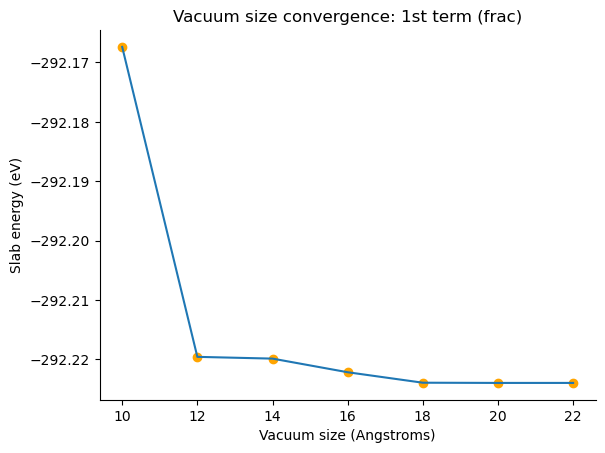

In [115]:
# Plot energies of 001_1_term vacuum convergence (fractional coordinates)

vacuum_size = np.array([10, 12, 14, 16, 18, 20, 22])
vacuum_energies_1_term_frac = np.array([-292.16738715, -292.21959397, -292.21988966, -292.22218500, -292.22394933, -292.22398461, -292.22398461])

plt.plot(vacuum_size, vacuum_energies_1_term_frac)
plt.scatter(vacuum_size, vacuum_energies_1_term_frac, color="orange")
plt.xlabel("Vacuum size (Angstroms)")
plt.ylabel("Slab energy (eV)")
plt.title("Vacuum size convergence: 1st term (frac)")
plt.gca().spines[["top", "right"]].set_visible(False)

# ENERGY CONVERGES AT 18 ANGSTROMS OF VACUUM

In [ ]:
# Plot energies of 001_1_term vacuum convergence (real coordinates)
vacuum_energies_1_term_real = np.array([-187.62857906, ])

plt.plot(vacuum_size, vacuum_energies_1_term_real)
plt.scatter(vacuum_size, vacuum_energies_1_term_real, color="orange")
plt.xlabel("Vacuum size (Angstroms)")
plt.ylabel("Slab energy (eV)")
plt.title("Vacuum size convergence: 1st term (Real)")
plt.gca().spines[["top", "right"]].set_visible(False)

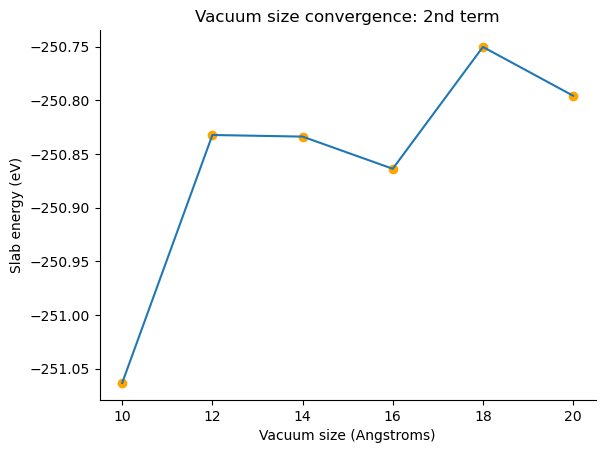

In [112]:
# Plot energies of 001_2_term vacuum convergence

vacuum_energies_2_term = np.array([-251.06334820, -250.83226088, -250.83375398, -250.86374712, -250.75016834, -250.79565412])

plt.plot(vacuum_size[:-1], vacuum_energies_2_term)
plt.scatter(vacuum_size[:-1], vacuum_energies_2_term, color="orange")
plt.xlabel("Vacuum size (Angstroms)")
plt.ylabel("Slab energy (eV)")
plt.title("Vacuum size convergence: 2nd term")
plt.gca().spines[["top", "right"]].set_visible(False)

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

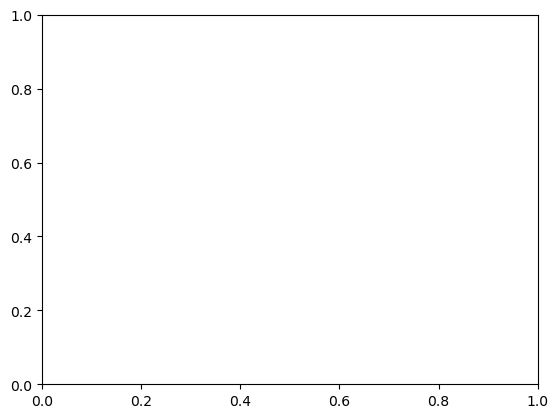

In [105]:
# Plot energies of 001_3_term vacuum convergence

vacuum_energies_3_term = np.array([])

plt.plot(vacuum_size, vacuum_energies_3_term)
plt.scatter(vacuum_size, vacuum_energies_3_term, color="orange")
plt.xlabel("Vacuum size (Angstroms)")
plt.ylabel("Slab energy (eV)")
plt.title("Vacuum size convergence: 3rd term")
plt.gca().spines[["top", "right"]].set_visible(False)

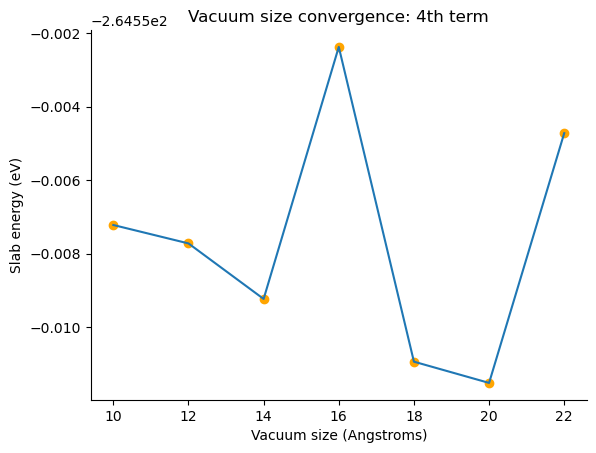

In [113]:
# Plot energies of 001_2_term vacuum convergence

vacuum_energies_4_term = np.array([-264.55722069, -264.55772248, -264.55923466, -264.55236937, -264.56094391, -264.56152273, -264.55471826])

plt.plot(vacuum_size, vacuum_energies_4_term)
plt.scatter(vacuum_size, vacuum_energies_4_term, color="orange")
plt.xlabel("Vacuum size (Angstroms)")
plt.ylabel("Slab energy (eV)")
plt.title("Vacuum size convergence: 4th term")
plt.gca().spines[["top", "right"]].set_visible(False)